Veri setini yıl,ülke ve deneyim seviyelerine göre incelemeye çalıştım.

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [263]:
df=pd.read_csv(r"C:/Users/Ertuğrul/Desktop/staj/anaylsisofsalaries/ds_salaries.csv")

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [265]:
df.head(20)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


Veri setinde basitçe çalışacağımız alanların dışında kalan sütunları dışarıya çıkarıyoruz.

In [266]:
df2=df.drop(["Unnamed: 0","employment_type","job_title","salary_currency","remote_ratio","company_size","company_location","salary"],axis=1)
df2


,work_year,experience_level,salary_in_usd,employee_residence
0,2020,MI,79833,DE
1,2020,SE,260000,JP
2,2020,SE,109024,GB
3,2020,MI,20000,HN
4,2020,SE,150000,US
...,...,...,...,...
602,2022,SE,154000,US
603,2022,SE,126000,US
604,2022,SE,129000,US
605,2022,SE,150000,US


Veri setindeki değerlerin analizini yaparken korelasyon kullanmayacağım ancak yine de veriler arasında herhangi bir güçlü doğrusal ilişki olup olmadığına bakmak istedim, beklenildiği üzere yok.(Unnamed:0 ve work_year sütunlarını saymazsak çünkü unnamed sütunu da index=0 gibi davranıyor)

In [267]:
df.corr()

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_12216\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


In [268]:
# uniqueArr=dfNew["experience_level"].unique()
# print(uniqueArr)
# arr1=[]
# for i in range(0,len(uniqueArr)):
#     arr1.append([uniqueArr[i],dfNew["experience_level"].value_counts()[uniqueArr[i]]])
# print(arr1)

# print(arr1[0])
experience_levels_count=df["experience_level"].value_counts()
experience_levels_count

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

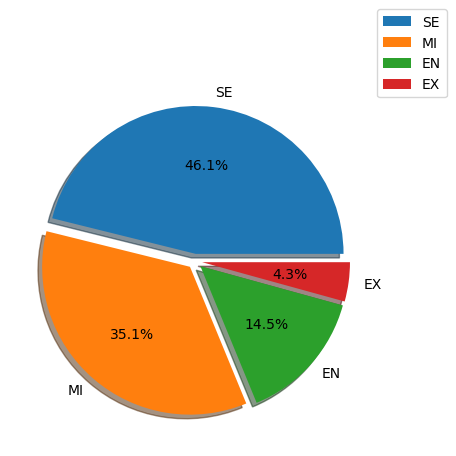

In [269]:
#Experience_level'e göre dağılım
experience_level_type=["SE","MI","EN","EX"]
plt.pie(experience_levels_count,labels=experience_level_type,shadow=True,explode=(0.05,0.05,0.05,0.05),autopct="%.1f%%")
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1.2))


Ortalamalara baktığımızda tüm şirketlerde çalışanların %81.2 gibi büyük kısmını orta(MI) ve orta üst(SE) seviyeler oluşturmaktadır.Şirketlerdeki çalışanların seviyesini biz tahmin etsek genel olarak buna yakın sonuçları tahmin ederdik.

Text(0, 0.5, 'Salary mean')

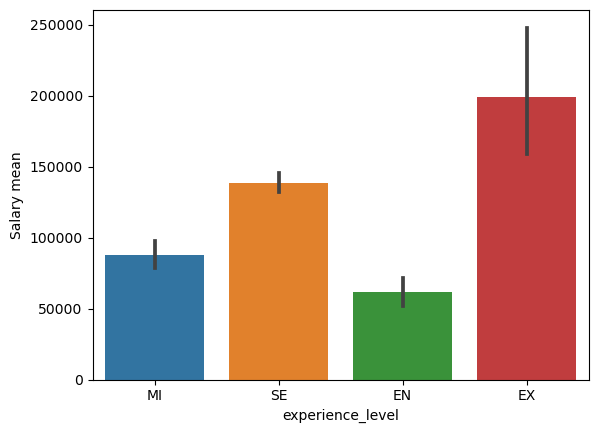

In [270]:
salary_mean=df.groupby('experience_level').agg({'salary_in_usd' : 'mean'})
salary_mean
experience_level=salary_mean.index.get_level_values("experience_level")



#Experience level'a göre ortalama maaş
plt.figure()
sns.barplot(x="experience_level", y='salary_in_usd', data=df)
plt.ylabel("Salary mean")




Ortalama maaş konusunda da beklenen aşağı yukarı böyle oluşurdu.En üst seviye ile ilk seviye arası 3kat, ilk seviye ve üçüncü seviye arası 2kat maaş farkı oluşmuş.

                            salary_in_usd
work_year experience_level               
2020      EN                   63648.6000
          EX                  202416.5000
          MI                   85950.0625
          SE                  137240.5000


Text(0.5, 1.0, '2020')

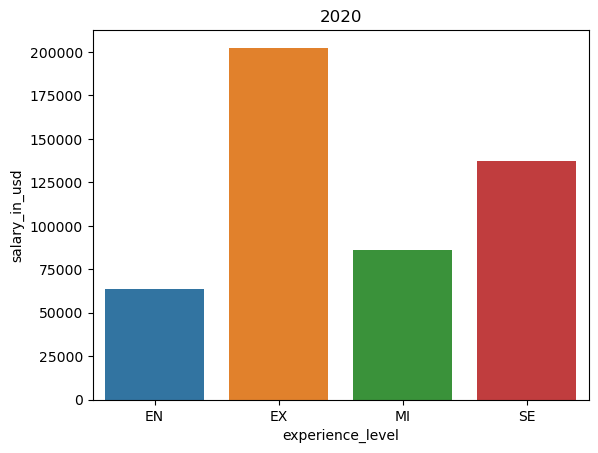

In [271]:
#Experience level'a göre her yılın ortalama maaşlar
sm2=df.groupby(["work_year","experience_level"]).agg({'salary_in_usd' : 'mean'})
sm2
sm2=np.array_split(sm2,3)
# type(sm2)
dFnew=sm2[0]
dFnew2=sm2[1]
dFnew3=sm2[2]
# type(dFnew)
print(dFnew) # 2020 yılının ortalama maaşı
sns.barplot(x=dFnew.index.get_level_values("experience_level"),y="salary_in_usd",data=dFnew)
plt.title("2020")

                            salary_in_usd
work_year experience_level               
2021      EN                 59101.021277
          EX                223752.727273
          MI                 85490.088889
          SE                126596.188406


Text(0.5, 1.0, '2021')

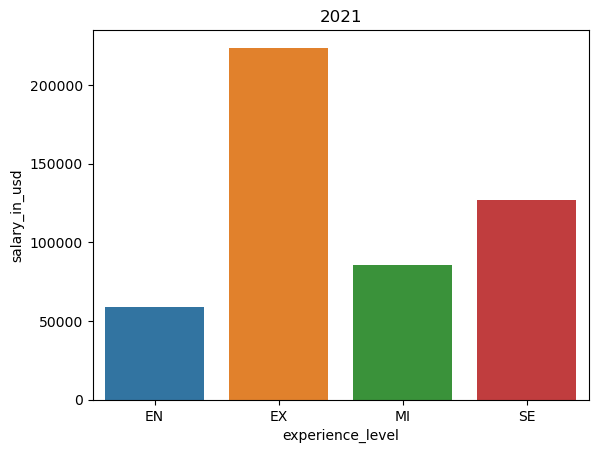

In [272]:
print(dFnew2)
sns.barplot(x=dFnew2.index.get_level_values("experience_level"),y="salary_in_usd",data=dFnew2)
plt.title("2021")




                            salary_in_usd
work_year experience_level               
2022      EN                 65423.428571
          EX                178313.846154
          MI                 91193.956044
          SE                143043.398964


Text(0.5, 1.0, '2022')

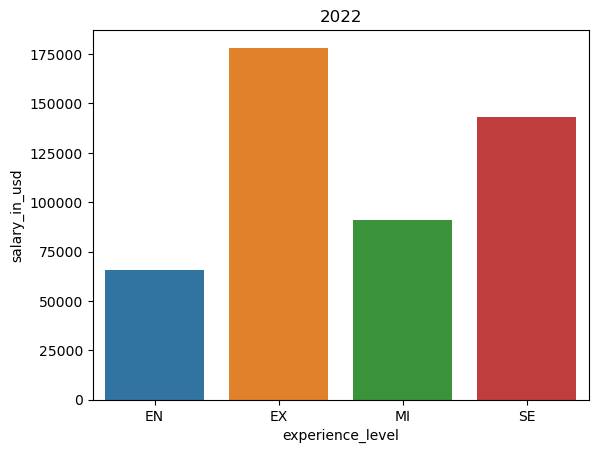

In [273]:
print(dFnew3)
sns.barplot(x=dFnew3.index.get_level_values("experience_level"),y="salary_in_usd",data=dFnew3)
plt.title("2022")

2020,2021,2022 değerlerini tablodan incelediğimzde aralarında çok büyük bir farklar görülmediği gözüküyor ancak tablodan değerleri tek tek incelediğimizde ise ilgi çekici olan durum; 2020 yılında Entry Level ve Senior level maaşlarının 2021 yılından daha yüksek olması, genelde maaşlar yıllar geçtikçe artış gösterme eğilimindedir ancak bu veri setimize göre bu 2 seviye türü çalışanların maaşlarında düşüş gerçekleşmiş.İki sebepten ötürü böyle bir durum oluşmuş olabilir.İlk olarak veri setimizdeki maaş değerlerinin hatalı olması kuvvetli bir ihtimalken ikinci olaraksa sektörde bu yıllardaki yeni mezunların sayısındaki artıştan ötürü rekabetin artmış olması olabilir.

2022    318
2021    217
2020     72
Name: work_year, dtype: int64


Text(0.5, 1.0, 'number of employees per year')

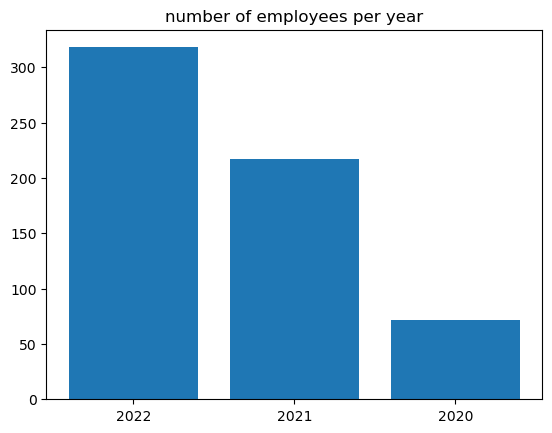

In [274]:

work_year_count=df["work_year"].value_counts()
print(work_year_count)
years=["2022","2021","2020"]
work_year_count
plt.bar(years,work_year_count)
plt.title("number of employees per year")

           salary_in_usd
work_year               
2020        95813.000000
2021        99853.792627
2022       124522.006289


Text(0.5, 1.0, 'Average salary by year')

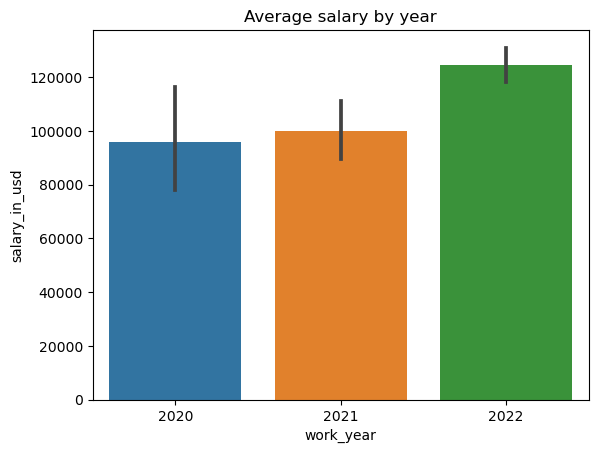

In [275]:
print(df.groupby("work_year").agg({'salary_in_usd' : 'mean'}))


sns.barplot(x="work_year",y="salary_in_usd",data=df)
plt.title("Average salary by year")




verileri aldığımız şirketleri incelediğimizde bu şirketlerde 2020 yılına göre çalışan sayılarında büyük bir artış olduğu gözlenmektedir.Ayrıca ortalama maaş konusunda da beklenildiği üzere artış gözükmektedir.

   employee_residence  employee_residence_count
0                  US                       332
1                  GB                        44
2                  IN                        30
3                  CA                        29
4                  DE                        25
5                  FR                        18
6                  ES                        15
7                  GR                        13
8                  JP                         7
9                  PT                         6
10                 BR                         6
11                 PK                         6
12                 NL                         5
13                 PL                         4
14                 IT                         4
15                 RU                         4
16                 AE                         3
17                 AT                         3
18                 VN                         3
19                 TR                   

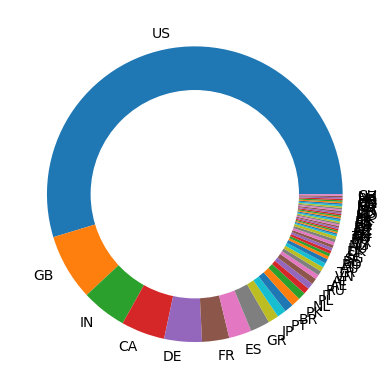

In [276]:
employee_residence_count=df["employee_residence"].value_counts()
df_erc=employee_residence_count.to_frame().reset_index()
df_erc.rename(columns={'employee_residence': 'employee_residence_count'}, inplace=True)
df_erc.rename(columns={'index': 'employee_residence'}, inplace=True)

# df_erc.reset_index()
print(df_erc)
print(type(df_erc))


# names=list(set(df["employee_residence"]))
# print(names)
my_circle=plt.Circle((0,0),0.7,color="white")
plt.pie(df_erc["employee_residence_count"],labels=df_erc["employee_residence"])
p=plt.gcf()
p.gca().add_artist(my_circle)


Elimizdeki veri setinde şirketlerde çalışanların neredeyse yarısının Amerikada ikamet ettiği gözükmektedir.Bu sonuçla dünyadaki bu sektörde çalışanların yarısının Amerikada olduğunu söylemek doğru olmaz çünkü elimizdeki veri seti tüm dünyadaki şirketlerde çalışanları kapsamamaktadır.Ayrıca çemberde 1 2 3 gibi ufak değerlerin karışıklık yarattığı da gözükmektedir.Bunun için belki dünya haritası üzerinden sayının artmasına göre rengin tonunun da koyulaşacağı bir görselleştirme tercih edilmesi daha doğru olurdu.

In [277]:

filtered=employee_residence_count[employee_residence_count>3]
filtered
# type(employee_residence_count)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
Name: employee_residence, dtype: int64

employee_residence
MY    200000.00000
PR    160000.00000
US    149194.11747
NZ    125000.00000
CH    122346.00000
Name: salary_in_usd, dtype: float64


Text(0.5, 1.0, '5 countries with the highest average salary')

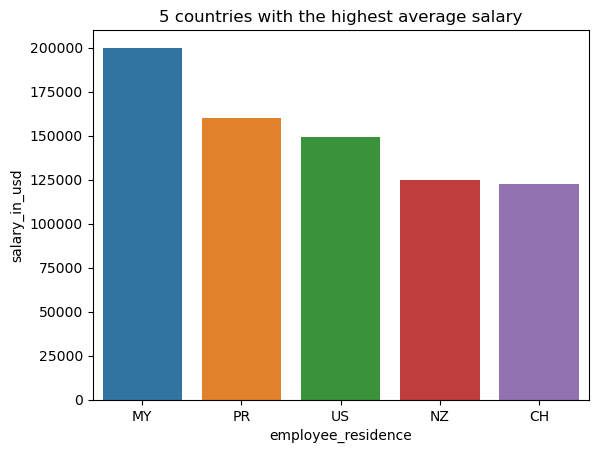

In [278]:
#ortalama maaşı en yüksek olan 5 ülke grafikleri
sm3 = df.groupby("employee_residence")['salary_in_usd'].mean().nlargest(5)
print(sm3)
sm3=sm3.to_frame()


sns.barplot(x=sm3.index.get_level_values("employee_residence"),y="salary_in_usd",data=sm3)

plt.title("5 countries with the highest average salary")


Genel tabloya baktığımızda Malezya(MY) ve Porto riko(PR), Amerikaya kıyasla daha yüksek ortalama maaş değerlerine sahip gözükmektedir.Ancak veri setinde malezya ve porto rikodan alınan şirket sayısının muhtemelen az olması bu iki ülkedeki maaşların Amerikadaki maaşlardan daha yüksek gözükmesine sebep olmuş olabilir.

In [279]:
sm4 = df.groupby(["work_year","employee_residence"])['salary_in_usd'].mean().groupby('work_year').nlargest(5).reset_index(level=0,drop=True)

sm4=np.array_split(sm4,3)
#sm4[0] #2020 yılı en yüksek ortalama maaşa sahip 5 şirket

a1=sm4[0]
dfnew=a1.to_frame()
print(dfnew)

# dfnew.reset_index() #multi index'i normale çevirir




                              salary_in_usd
work_year employee_residence               
2020      US                       157462.0
          JP                       150844.5
          NZ                       125000.0
          CA                       117104.0
          AE                       115000.0


Text(0.5, 1.0, '2020')

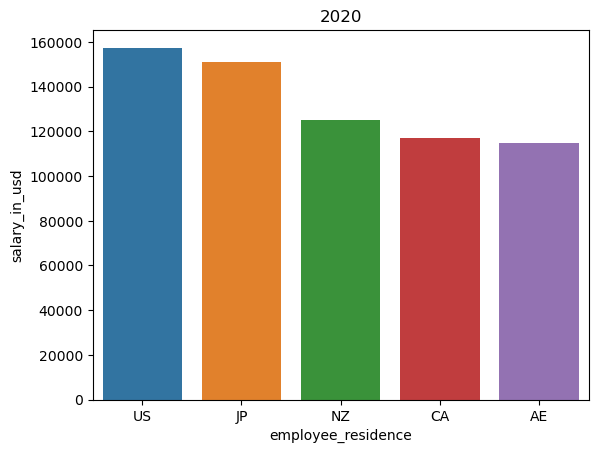

In [280]:

sns.barplot(x=dfnew.index.get_level_values("employee_residence"),y="salary_in_usd",data=dfnew)
plt.title("2020")


                              salary_in_usd
work_year employee_residence               
2021      PR                  160000.000000
          RU                  157500.000000
          US                  155562.356322
          SG                  104176.500000
          CA                  101475.333333


Text(0.5, 1.0, '2021')

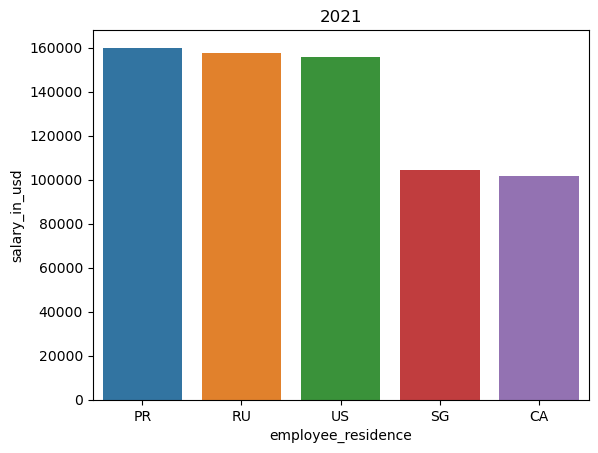

In [281]:
dfnew2=sm4[1].to_frame()
print(dfnew2)
sns.barplot(x=dfnew2.index.get_level_values("employee_residence"),y="salary_in_usd",data=dfnew2)
plt.title("2021")



                              salary_in_usd
work_year employee_residence               
2022      MY                  200000.000000
          US                  145736.236364
          CH                  122346.000000
          AU                  108042.666667
          DE                  101854.333333


Text(0.5, 1.0, '2022')

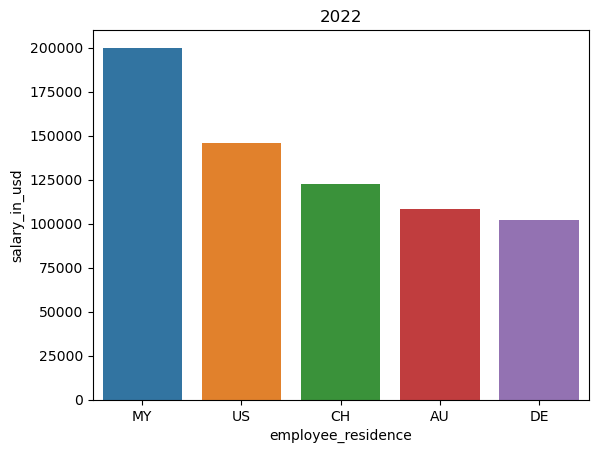

In [282]:
dfnew3=sm4[2].to_frame()
print(dfnew3)
sns.barplot(x=dfnew3.index.get_level_values("employee_residence"),y="salary_in_usd",data=dfnew3)
plt.title("2022")

2020 den 20222'ye doğru geldiğimizde ise Amerikanın listede ilk sıradayken aşağı doğru inişi diğer ülkelerdeki maaşların daha çok artmasından dolayı değil, Amerikadaki bu şirketlerden alınan yıllık ortalama maaşın her geçen yıl azalmasından kaynaklanmaktadır.Yukarıdaki örneklerde de belirttiğimiz gibi verilerin yeterli olmaması veya sektör içi rekabetin artmasından dolayı maaşlarda düşüş gözlenmesi Amerikada oluşan bu düşüşü açıklayabilir.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Bu bölümde ise yıl,tecrübe seviyesi,ikamet edilen yer parametrelerini kullanarak farklı regresyon türleriyle(Decision Tree ve Random Forest) maaşı tahmin edelim.Kullandığımız tahmin modellerinin başarı oranını ölçmek için MAE(mean_absolute_error), MSE(mean_squared_error) ve RMSE(root_mean_squared_error) gibi metriklerle aralarında kıyas yapalım.

Öncelikle elimizdeki kategorik değerleri (Employee_residence ve experience_level) sayısala çevirmek için Label Encoder kullanalım.(İleride ise OneHotEncoder kullanarak Label Encoder ile kıyaslama da yapalım.)

In [283]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df2=df2[["work_year","experience_level","employee_residence","salary_in_usd"]]
print(type(df2))
encoded_column=lb.fit_transform(df2["experience_level"])
encoded_column2=lb.fit_transform(df2["employee_residence"])
df2["experience_level"]=encoded_column
df2["employee_residence"]=encoded_column2
print(type(df2))
x=df2.iloc[:,0:3]
y=df2["salary_in_usd"]
X=x.values
Y=y.values
df2



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,work_year,experience_level,employee_residence,salary_in_usd
0,2020,2,14,79833
1,2020,3,32,260000
2,2020,3,20,109024
3,2020,2,23,20000
4,2020,3,55,150000
...,...,...,...,...
602,2022,3,55,154000
603,2022,3,55,126000
604,2022,3,55,129000
605,2022,3,55,150000


In [284]:
print(df2["salary_in_usd"].min())
print(df2["salary_in_usd"].max())

2859
600000


Regresyon modelleri kullanarak maaş tahmini yapacağız ve gördüğümüz üzere maaşın aralığı çok yüksek,Bu yüzden metriklerde çok yüksek sonuçlar alabiliriz ancak bizim için önemli olan bu sonuçların yüksekliği değil, regresyon modellerinde bu değerlere göre en başarılı tahmin modelini bulabilmek.

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
y_pred




array([148227.6962963 ,  28609.        ,  78173.16666667, 148227.6962963 ,
       102838.5       , 100000.        , 148227.6962963 ,  45807.        ,
       175120.        , 148227.6962963 , 148227.6962963 ,  62651.        ,
        84150.25      , 148227.6962963 ,  65000.        ,  53858.        ,
       148227.6962963 , 148227.6962963 ,  95000.        , 148227.6962963 ,
       151293.75      , 175120.        , 134163.88888889,  65000.        ,
       135936.        ,  75000.        , 109008.66666667,  93964.28571429,
       104176.5       ,  78911.05882353, 148227.6962963 ,  85825.        ,
        45807.        ,  12650.75      , 134163.88888889, 148227.6962963 ,
       148227.6962963 , 148227.6962963 ,  78911.05882353, 148227.6962963 ,
        72291.        , 104588.25      , 151293.75      , 148227.6962963 ,
       148227.6962963 , 177763.88888889,  78911.05882353,  85825.        ,
       168000.        ,  56770.25      , 148227.6962963 ,  78911.05882353,
       148227.6962963 ,  

DecisionTreeRegressor kullanarak veri setimizi eğittik ve X_test değerlerini tahmin ettirdik.Bunları y_pred ile bastırdık. Şu an bize sonuç olarak gelen array kümesi çok büyük bir anlam ifade etmiyor ancak başarısını diğer regresyon modelleriyle kıyasladıkça anlam ifade edecektir.

In [286]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("mae: ",mae)
mse = mean_squared_error(y_test, y_pred)
print("mse: ",mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("rmse: ",rmse)

mae:  37033.05355331568
mse:  3308379259.732701
rmse:  57518.512321970746


3 Metriğe göre DecisionTreeRegressor'un başarı oranı hakkında bilgi edinmek için hesabımızı yaptık.Bunun daha da anlam kazanması için RandomForestRegressor ile kıyaslayalım.

In [287]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X,Y)
y_pred2=rfr.predict(X_test)
y_pred2

array([148030.34738562,  44239.16666667,  78637.10702381, 148030.34738562,
       121358.96666667,  53001.4       , 148030.34738562,  43756.63333333,
       176002.70482721, 148030.34738562, 148030.34738562, 174765.1       ,
        83535.61857143, 148030.34738562,  75666.66666667,  56093.61349206,
       148030.34738562, 148030.34738562, 107881.94444444, 148030.34738562,
       141187.78402153, 176002.70482721, 151961.49509215,  85916.66666667,
        76005.9       ,  73317.175     ,  31803.36666667,  90124.32364613,
        33587.8       ,  82310.29025309, 148030.34738562, 117890.00569986,
        43756.63333333,  16921.54642857, 151961.49509215, 148030.34738562,
       148030.34738562, 148030.34738562,  82310.29025309, 148030.34738562,
        72152.90095238,  94298.91829365, 141187.78402153, 148030.34738562,
       148030.34738562, 183701.99990981,  82310.29025309, 117890.00569986,
       200551.1       ,  50400.38202381, 148030.34738562,  82310.29025309,
       148030.34738562,  

In [288]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae2=mean_absolute_error(y_test,y_pred2)
mse2=mean_squared_error(y_test,y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
print("MAE: ",mae2)
print("MSE: ",mse2)
print("RMSE: ",rmse)


MAE:  30721.973443780553
MSE:  2573384181.0894475
RMSE:  57518.512321970746


Burada da aynı metriklerle RandomForestRegressor'a göre başarı oranı hesapladık. Şimdi bunları yan yana görelim ki yorumumuzu yapalım.

In [289]:
print(f"DecisionTreeRegressor MAE değeri: {mae}, Random Forest Regressor MAE değeri: {mae2}.")
print(f"DecisionTreeRegressor MSE değeri: {mse}, Random Forest Regressor MSE değeri: {mse2}.")
print(f"DecisionTreeRegressor RMSE değeri: {rmse}, Random Forest Regressor RMSE değeri: {rmse2}.")

DecisionTreeRegressor MAE değeri: 37033.05355331568, Random Forest Regressor MAE değeri: 30721.973443780553.
DecisionTreeRegressor MSE değeri: 3308379259.732701, Random Forest Regressor MSE değeri: 2573384181.0894475.
DecisionTreeRegressor RMSE değeri: 57518.512321970746, Random Forest Regressor RMSE değeri: 50728.53419023112.


Yukarıda elde ettiğimiz sonuçlara göre Random Forest Regressor'ın değerleri Decision Tree Regressor'ın değerlerinden daha düşük olduğu gözükmektedir.(Hesapladığımız değerler hata oranıdır.Hata oranları düştükçe başarı o kadar artmaktadır.). Random Forest bu veri setimizde maaşı tahmin etme açısından Decision Tree'den daha başarılı olduğu bariz gözükmektedir.Peki bu çıkarımı test etmeden yapabilir miydik?

Elimizdeki veri setini incelediğimizde aslında Random Forest'ın daha başarılı sonuç çıkaracağını tahmin edebilirdik. Random Forest daha büyük bir veri seti ve hesaplama gücüne sahip bir sistemde Decision Tree'den daha iyi sonuçlar çıkarmaktadır.Ayrıca Decision Tree tek bir ağaç kullandığından ötürü ağaç aşırı uyum sağlama eğiliminde olabilmektedir. Random Forest ise birden çok ağacın bir araya gelmesiyle tahmin yapmaktadır.Her ağacın tahminlerinin ortalamasını alarak birleştirmektedir.Bu sebepten ötürü her ağacın kendi hatalarını diğerleri dengeleyerek genellikle daha iyi genelleştirme yeteneğine sahiptir. 

Sonuç olarak Random Forest veri seti büyüdüğünde ve bu büyük veri setlerini ezberlemeyip daha iyi genelleştirme yeteneğine sahip olduğundan dolayı(Decision Tree'ye göre) bu maaş tahmini örneğimizde daha başarılı sonuçlar ortaya çıkardı.

    **2 temel regresyon modeliyle bu kıyaslamamızı bitirdik. Bir de olaya daha farklı bir boyut olan veri setimizdeki kategorik değerleri sayısala çevirirken  kullandığımız 2 method olan Label Encoder ve One Hot Encoder kıyasıyla bakalım.**

Şimdi ise Label Encoder yerine OneHotEncoder kullanalım ve ayrıca employee_residence gibi çok sayıda sonucu olan satırımıza OneHotEncoder uyguladıktan sonra boyut indirgeme tekniği olan PCA methodunu uygulayalım.


LabelEncoder uygulamadan önce kullanmayacağımız satırları attığımız gibi yine atalım ve bunun üstüne OneHotEncoder uygulayalım.

In [290]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
df3=df.drop(["Unnamed: 0","employment_type","job_title","salary_currency","remote_ratio","company_size","company_location","salary"],axis=1)
df3=df3[["work_year","experience_level","employee_residence","salary_in_usd"]]
df3

,work_year,experience_level,employee_residence,salary_in_usd
0,2020,MI,DE,79833
1,2020,SE,JP,260000
2,2020,SE,GB,109024
3,2020,MI,HN,20000
4,2020,SE,US,150000
...,...,...,...,...
602,2022,SE,US,154000
603,2022,SE,US,126000
604,2022,SE,US,129000
605,2022,SE,US,150000


In [291]:
ohe=OneHotEncoder()
el_encoded=ohe.fit_transform(df3[["experience_level"]])
ohe2=OneHotEncoder()
er_encoded=ohe2.fit_transform(df3[["employee_residence"]])

pca=PCA(n_components=3)
er_pca=pca.fit_transform(er_encoded.toarray())
er_pca_df=pd.DataFrame(data=er_pca,columns=["PC1","PC2","PC3"])

el_encoded_df=pd.DataFrame(data=el_encoded.toarray(),columns=["Experience level1","Experience level2","Experience level3","Experience level4"])

newdf3=pd.concat([df3,er_pca_df,el_encoded_df],axis=1)
newdf3=newdf3.drop(["experience_level","employee_residence"],axis=1)
newdf3=newdf3[["work_year","PC1","PC2","PC3","Experience level1","Experience level2","Experience level3","Experience level4","salary_in_usd"]]
newdf3

,work_year,PC1,PC2,PC3,Experience level1,Experience level2,Experience level3,Experience level4,salary_in_usd
0,2020,0.581859,-0.225973,-0.077380,0.0,0.0,1.0,0.0,79833
1,2020,0.514264,-0.102533,-0.015553,0.0,0.0,0.0,1.0,260000
2,2020,0.675591,0.834468,0.024211,0.0,0.0,0.0,1.0,109024
3,2020,0.495093,-0.086739,-0.012282,0.0,0.0,1.0,0.0,20000
4,2020,-0.468576,0.011569,0.001158,0.0,0.0,0.0,1.0,150000
...,...,...,...,...,...,...,...,...,...
602,2022,-0.468576,0.011569,0.001158,0.0,0.0,0.0,1.0,154000
603,2022,-0.468576,0.011569,0.001158,0.0,0.0,0.0,1.0,126000
604,2022,-0.468576,0.011569,0.001158,0.0,0.0,0.0,1.0,129000
605,2022,-0.468576,0.011569,0.001158,0.0,0.0,0.0,1.0,150000


Employee_residence için sadece OneHotEncoder kullansak veri setimizde çok büyük bir yük olacaktı.Bunun üstüne PCA uygulayıp boyut indirgedik.Experience level ise sadece OneHotEncoder uygulanarak 4 farklı column oluşturmuş oldu. Şimdi test zamanı.

In [292]:
from sklearn.model_selection import train_test_split
x2=newdf3.iloc[:,0:8]
y2=newdf3["salary_in_usd"]
X2=x2.values
Y2=y2.values


X_train2, X_test2, y_train2, y_test2= train_test_split(X2,Y2,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeRegressor
dtr2=DecisionTreeRegressor(random_state=0)
dtr2.fit(X_train2,y_train2)
y_pred3=dtr2.predict(X_test2)
y_pred3

array([148227.6962963 ,  10000.        ,  78173.16666667, 148227.6962963 ,
       102838.5       ,   4000.        , 148227.6962963 ,  45807.        ,
       175120.        , 148227.6962963 , 148227.6962963 ,  71444.        ,
        84150.25      , 148227.6962963 ,  71444.        ,  53858.        ,
       148227.6962963 , 148227.6962963 ,  95000.        , 148227.6962963 ,
       151293.75      , 175120.        , 134163.88888889,  65000.        ,
       153667.        ,  76773.33333333,  12000.        ,  93964.28571429,
        58875.71428571,  78911.05882353, 148227.6962963 ,  85825.        ,
        45807.        ,  12650.75      , 134163.88888889, 148227.6962963 ,
       148227.6962963 , 148227.6962963 ,  78911.05882353, 148227.6962963 ,
        72291.        , 104588.25      , 151293.75      , 148227.6962963 ,
       148227.6962963 , 177763.88888889,  78911.05882353,  85825.        ,
        60000.        ,  56770.25      , 148227.6962963 ,  78911.05882353,
       148227.6962963 ,  

In [293]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae3 = mean_absolute_error(y_test2, y_pred3)
print("mae: ",mae3)
mse3 = mean_squared_error(y_test2, y_pred3)
print("mse: ",mse3)
rmse3 = mean_squared_error(y_test2, y_pred3, squared=False)
print("rmse: ",rmse3)

mae:  37941.94767899874
mse:  3549590107.180992
rmse:  59578.43659564249


Burada OneHotEncoder ve PCA kullanarak DecisionTreeRegressor modelinde yaptığımız tahminlerin hata oranlarını hesapladık.

In [294]:
from sklearn.ensemble import RandomForestRegressor
rfr2=RandomForestRegressor(n_estimators=10,random_state=0)
rfr2.fit(X2,Y2)
y_pred4=rfr2.predict(X_test2)
y_pred4

array([148030.34738562,  26123.56666667,  78637.10702381, 148030.34738562,
       125668.75666667,  27801.46666667, 148030.34738562,  43756.63333333,
       176002.70482721, 148030.34738562, 148030.34738562, 112537.43333333,
        83535.61857143, 148030.34738562, 112537.43333333,  56093.61349206,
       148030.34738562, 148030.34738562, 107881.94444444, 148030.34738562,
       141187.78402153, 176002.70482721, 151961.49509215,  88203.30666667,
        76005.9       ,  82487.8852381 ,  12382.925     ,  90124.32364613,
        44528.74674242,  82310.29025309, 148030.34738562, 117890.00569986,
        43756.63333333,  16921.54642857, 151961.49509215, 148030.34738562,
       148030.34738562, 148030.34738562,  82310.29025309, 148030.34738562,
        72152.90095238,  94298.91829365, 141187.78402153, 148030.34738562,
       148030.34738562, 183701.99990981,  82310.29025309, 117890.00569986,
       214000.        ,  50400.38202381, 148030.34738562,  82310.29025309,
       148030.34738562,  

In [295]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae4=mean_absolute_error(y_test2,y_pred4)
mse4=mean_squared_error(y_test2,y_pred4)
rmse4 = mean_squared_error(y_test2, y_pred4, squared=False)
print("MAE: ",mae4)
print("MSE: ",mse4)
print("RMSE: ",rmse4)

MAE:  32103.94166867657
MSE:  2680924241.025453
RMSE:  51777.64228917201


Burada OneHotEncoder ve PCA kullanarak RandomForestRegressor modelinde yaptığımız tahminlerin hata oranlarını hesapladık.

SON OLARAK

Random Forest Regressor üzerinden Label Encoder kullanılmış tahmin modelindeki hata oranları ile One Hot Encoder ve PCA'nın beraber kullanıldığı tahmin modelindeki hata oranlarını karşılaştıralım.

In [296]:
print(f"Label Encoder uygulanmış Random Forest Regressor MAE değeri: {mae2}.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor MAE değeri: {mae4}")
print(f"Label Encoder uygulanmış Random Forest Regressor MSE değeri: {mse2}.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor MSE değeri: {mse4}")
print(f"Label Encoder uygulanmış Random Forest Regressor RMSE değeri: {rmse2}.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor RMSE değeri: {rmse4}")

Label Encoder uygulanmış Random Forest Regressor MAE değeri: 30721.973443780553.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor MAE değeri: 32103.94166867657
Label Encoder uygulanmış Random Forest Regressor MSE değeri: 2573384181.0894475.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor MSE değeri: 2680924241.025453
Label Encoder uygulanmış Random Forest Regressor RMSE değeri: 50728.53419023112.  OneHotEncoder ve PCA uygulanmış Random Forest Regressor RMSE değeri: 51777.64228917201


Normal şartlarda genelleme yapacak olursak One Hot Encoder kullanmak Label Encoder kullanmaktan daha faydalıdır diyebiliriz. Ancak doğru yaklaşım, elimizdeki veri setinin özellikleri ve kullanacağımız makine öğrenme modeline bağlı olarak ikisinden birini tercih etmemizdir. Label Encoder genel anlamda kategori sayısı çok yüksek olduğunda avantajlı olmaktadır.One Hot Encoder ise kategori sayısı az ve hepsi eşit öneme sahip olduğunda tercih edilmelidir.Bizim veri setimizde ise employee_residence içinde birden çok değer barındıran ve hepsinin eşit öneme sahip olmadığı bir durum olduğu çok net gözükmektedir.Yaşanılan ülkenin gelişmişlik seviyesi gibi faktörlerden ötürü maaşı daha yüksek veya daha düşük olabilir bu yüzden eşit öneme sahip değillerdir.Ayrıca deneyim düzeyi arttıkça maaşında artması beklenilen bir şey olduğundan dolayı tüm deneyim düzeylerini eşit önem kabul etmekte doğru değildir. BU YÜZDEN;

     **SADECE BU ÖRNEĞİMİZ İÇİN KONUŞACAK OLURSAK, LABEL ENCODER ONE HOT ENCODER'DAN DAHA İYİ SONUÇ VERDİ DİYEBİLİRİZ.**

Derin Öğrenme türlerinden olan CNN RNN ve LSTM modellerinin ne olduğu ve hangi örnekler altında kullanmanın iyi olacağı hakkında hazırladığım DeepLearning projem profilimde..Burada ise bunlardan hangisi elimdeki veri setine uyar ve tahmin yapabiliriz bunu düşündüm,CNN genellikle görüntü işleme gibi görsel veriler üzerinde kullanılan bir derin öğrenme modeli olduğu için ve aynı zamanda RNN kullanmak yerine RNN'den türetilmiş daha özel olan LSTM modeliyle salary_in_usd parametresinin tahminini grafiğe dökmeyi deneyeceğim.

In [297]:

df2

,work_year,experience_level,employee_residence,salary_in_usd
0,2020,2,14,79833
1,2020,3,32,260000
2,2020,3,20,109024
3,2020,2,23,20000
4,2020,3,55,150000
...,...,...,...,...
602,2022,3,55,154000
603,2022,3,55,126000
604,2022,3,55,129000
605,2022,3,55,150000


In [298]:
from sklearn.preprocessing import MinMaxScaler
df2=np.array(df2).reshape(-1,1)
sc=MinMaxScaler()
df2=sc.fit_transform(df2)
train=df2[0:480,:]
test=df2[480:,:]

In [299]:
def veri(data,steps):
    datax=[]
    datay=[]
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps),0]
        datax.append(a)
        datay.append(data[i+steps,0])

    return np.array(datax),np.array(datay)

In [300]:
steps=5
xtrain3,ytrain3=veri(train,steps)
xtest3,ytest3=veri(test,steps)

xtrain3=np.reshape(xtrain3,(xtrain3.shape[0],1,xtrain3.shape[1]))
xtest3=np.reshape(xtest3,(xtest3.shape[0],1,xtest3.shape[1]))

In [301]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

model=Sequential()
model.add(LSTM(128,input_shape=(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")



In [302]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               68608     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 76929 (300.50 KB)
Trainable params: 76929 (300.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
# xtrain3 = xtrain3.astype('int32')
# ytrain = ytrain3.astype('int32')

model.fit(xtrain3,ytrain3,epochs=10,batch_size=1)


Epoch 1/10


474/474 [==============================] - 2s 1ms/step - loss: 0.0086
Epoch 2/10
474/474 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 3/10
474/474 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 4/10
474/474 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 5/10
474/474 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 6/10
474/474 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 7/10
474/474 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 8/10
474/474 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 9/10
474/474 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 10/10
474/474 [==============================] - 1s 2ms/step - loss: 0.0075


61/61 [==============================] - 0s 1ms/step


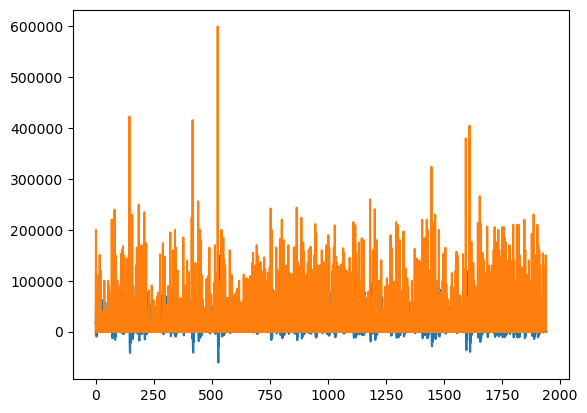

<Figure size 640x480 with 0 Axes>

In [304]:
ypred3=model.predict(xtest3)
# print(ytest3.shape)

ypred3=sc.inverse_transform(ypred3.reshape(-1,1))
ytest3=sc.inverse_transform(ytest3.reshape(-1,1))
# print(ytest3)
# print(ypred3)
plt.plot(ypred3,label="tahmini değerler")
plt.plot(ytest3,label="gerçek değerler")
plt.figure()
plt.show()

LSTM modelininde bu veri setine çok uygun olmadığı,diğer projemle kıyasladığımızda bariz gözükmektedir.. CNN,RNN ve LSTM gibi derin öğrenme modellerini, kendilerine daha uygun başka veri setleriyle kıyasladığım projelerde görüşmek üzere. :)